In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Load train and test datasets
def load_data():
    train_dataset = h5py.File("/Users/hangye/Downloads/train_catvnoncat.h5", "r")
    test_dataset = h5py.File("/Users/hangye/Downloads/test_catvnoncat.h5", "r")
    
    train_x = np.array(train_dataset["train_set_x"][:])  # Training features
    train_y = np.array(train_dataset["train_set_y"][:])  # Training labels
    test_x = np.array(test_dataset["test_set_x"][:])    # Test features
    test_y = np.array(test_dataset["test_set_y"][:])    # Test labels
    
    train_y = train_y.reshape((1, train_y.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))
    
    return train_x, train_y, test_x, test_y

train_x, train_y, test_x, test_y = load_data()

# Check data dimensions
print(f"Train X shape: {train_x.shape}, Train Y shape: {train_y.shape}")
print(f"Test X shape: {test_x.shape}, Test Y shape: {test_y.shape}")


Train X shape: (209, 64, 64, 3), Train Y shape: (1, 209)
Test X shape: (50, 64, 64, 3), Test Y shape: (1, 50)


In [3]:
# Flatten the image data (64x64x3) into a single vector (12288)
def preprocess_data(train_x, test_x):
    train_x_flatten = train_x.reshape(train_x.shape[0], -1).T / 255.0
    test_x_flatten = test_x.reshape(test_x.shape[0], -1).T / 255.0
    return train_x_flatten, test_x_flatten

train_x, test_x = preprocess_data(train_x, test_x)

print(f"Flattened Train X shape: {train_x.shape}")
print(f"Flattened Test X shape: {test_x.shape}")


Flattened Train X shape: (12288, 209)
Flattened Test X shape: (12288, 50)


In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def initialize_parameters(dim):
    w = np.zeros((dim, 1))
    b = 0.0
    return w, b

def propagate(w, b, X, Y):
    m = X.shape[1]
    
    # Forward propagation
    A = sigmoid(np.dot(w.T, X) + b)
    cost = -np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) / m
    
    # Backward propagation
    dw = np.dot(X, (A - Y).T) / m
    db = np.sum(A - Y) / m
    
    return dw, db, cost

def optimize(w, b, X, Y, num_iterations, learning_rate):
    costs = []
    for i in range(num_iterations):
        dw, db, cost = propagate(w, b, X, Y)
        w -= learning_rate * dw
        b -= learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
            print(f"Cost after iteration {i}: {cost:.4f}")
    
    return w, b, costs

def predict(w, b, X):
    A = sigmoid(np.dot(w.T, X) + b)
    return (A > 0.5).astype(int)


In [7]:
# Initialize parameters
dim = train_x.shape[0]
w, b = initialize_parameters(dim)

# Train the model
w, b, costs = optimize(w, b, train_x, train_y, num_iterations=2000, learning_rate=0.005)

# Evaluate
train_predictions = predict(w, b, train_x)
test_predictions = predict(w, b, test_x)

train_accuracy = np.mean(train_predictions == train_y) * 100
test_accuracy = np.mean(test_predictions == test_y) * 100

print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")


Cost after iteration 0: 0.6931
Cost after iteration 100: 0.5845
Cost after iteration 200: 0.4669
Cost after iteration 300: 0.3760
Cost after iteration 400: 0.3315
Cost after iteration 500: 0.3033
Cost after iteration 600: 0.2799
Cost after iteration 700: 0.2600
Cost after iteration 800: 0.2429
Cost after iteration 900: 0.2280
Cost after iteration 1000: 0.2148
Cost after iteration 1100: 0.2031
Cost after iteration 1200: 0.1925
Cost after iteration 1300: 0.1830
Cost after iteration 1400: 0.1744
Cost after iteration 1500: 0.1665
Cost after iteration 1600: 0.1593
Cost after iteration 1700: 0.1527
Cost after iteration 1800: 0.1465
Cost after iteration 1900: 0.1409
Training Accuracy: 99.04%
Test Accuracy: 70.00%


Misclassified Indices: [ 5  6 10 11 13 18 19 28 29 30 33 34 41 44 46]


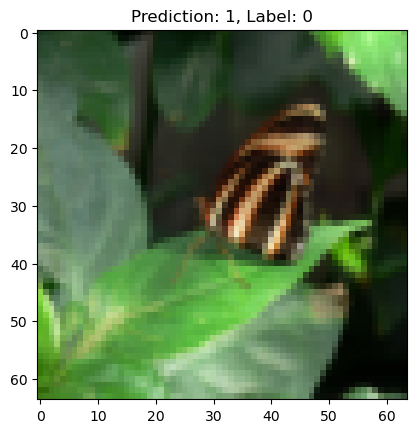

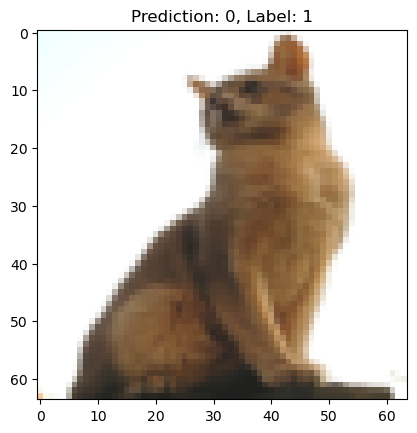

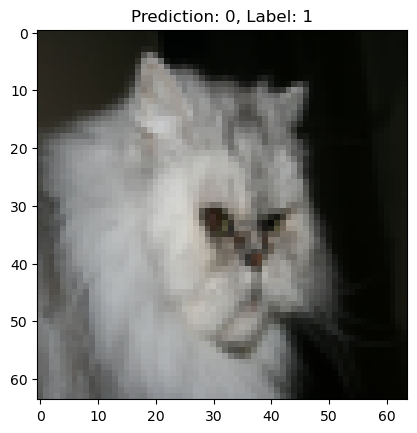

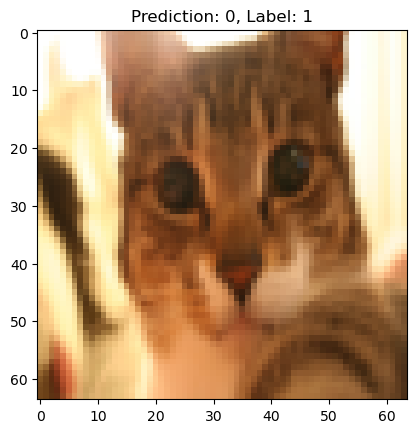

In [9]:
# Identify misclassified images
misclassified_indices = np.where(test_predictions != test_y)[1]
print(f"Misclassified Indices: {misclassified_indices}")

# Display 4 misclassified images
for i in misclassified_indices[:4]:
    plt.imshow(test_x[:, i].reshape((64, 64, 3)))
    plt.title(f"Prediction: {test_predictions[0, i]}, Label: {test_y[0, i]}")
    plt.show()
